# Ejercicios Clase 4

In [1]:
#@markdown Set Up

import pandas as pd
import numpy as np

np.random.seed(0)

# Creando datos de muestra
data = {
    "GRUPO": ["GC"]*500 + ["1D"]*500 + ["2D"]*500 + ["3D"]*500,
    "Outcome": np.concatenate([np.random.normal(0.2, 0.1, 500),  # Grupo de control con menor tasa de conversion
                               np.random.normal(0.6, 0.1, 500),  # Grupos de tratamiento con tasas de conversion mayores
                               np.random.normal(0.7, 0.1, 500),
                               np.random.normal(0.8, 0.1, 500)]),
    "shown": np.random.choice([True, False], size=2000)
}

# Creando DataFrame
df = pd.DataFrame(data)

# Asegurándonos que los valores de Outcome estén en el rango [0, 1]
df["Outcome"] = df["Outcome"].clip(0, 1)





### OTRA VERSION

np.random.seed(0)

# Fecha de inicio
start_date = pd.to_datetime("2017-01-01")

# Generamos fechas para 500 días
date_range_once = pd.date_range(start_date, periods=500)

# Repetimos la secuencia de fechas cuatro veces
date_range_repeated = np.tile(date_range_once, 4)

# Creando datos de muestra
data = {
    "GRUPO": ["GC"]*500 + ["1D"]*500 + ["2D"]*500 + ["3D"]*500,
    "Outcome": np.concatenate([np.random.normal(0.2, 0.1, 500),  # Grupo de control con menor tasa de conversion
                               np.random.normal(0.6, 0.1, 500),  # Grupos de tratamiento con tasas de conversion mayores
                               np.random.normal(0.7, 0.1, 500),
                               np.random.normal(0.8, 0.1, 500)]),
    "shown": np.random.choice([True, False], size=2000),
    "Date": date_range_repeated,

    # Asumimos que las transacciones acumuladas son un número aleatorio entre 10 y 100
    "Outcome_90d": np.random.randint(10, 100, size=2000).cumsum()
}

# Creando DataFrame
df = pd.DataFrame(data)

# Asegurándonos que los valores de Outcome estén en el rango [0, 1]
df["Outcome"] = df["Outcome"].clip(0, 1)





import pandas as pd
import numpy as np

import random

np.random.seed(0)

# Fecha de inicio
start_date = pd.to_datetime("2017-01-01")

# Generamos fechas para 500 días
date_range_once = pd.date_range(start_date, periods=500)

# Repetimos la secuencia de fechas cuatro veces
date_range_repeated = np.tile(date_range_once, 4)

# Factores de crecimiento para cada grupo
growth_factors = {"GC": 0.0001, "1D": 0.0002, "2D": 0.0003, "3D": 0.0004}

# Creando datos de muestra
data = {
    "GRUPO": ["GC"]*500 + ["1D"]*500 + ["2D"]*500 + ["3D"]*500,
    "Outcome": [],
    "shown": np.random.choice([True, False], size=2000),
    "Date": date_range_repeated,
    # Asumimos que las transacciones acumuladas son un número aleatorio entre 10 y 100
    # "Outcome_90d": np.random.randint(10, 100, size=2000).cumsum()
}

# Generamos las tasas de conversión para cada grupo
for group in ["GC", "1D", "2D", "3D"]:
    base_rate = 0.1  # tasa de conversión inicial
    growth_factor = growth_factors[group]
    rand = random.random() / 100
    rates = [base_rate + i*growth_factor + rand for i in range(500)]
    data["Outcome"].extend(rates)


# Creando DataFrame
df = pd.DataFrame(data)

# Asegurándonos que los valores de Outcome estén en el rango [0, 1]
df["Outcome"] = df["Outcome"].clip(0, 1)


## Verificación Gráfica del Efecto a Largo Plazo
Realice un gråfico para observar cómo los grupos que reciben diversas cantidades de descuentos se comportan a lo largo del tiempo.


El df se crea automáticamente en la celda "Set Up"

In [5]:
import matplotlib.pyplot as plt

def cumulative_transactions(df):
    groupby_time = df.groupby(["GRUPO", "Date"]).sum()["Outcome"]
    dates = df["Date"].unique()
    for group in ["GC", "1D", "2D", "3D"]:
        plt.plot(dates, groupby_time[group].values, label=group)
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()

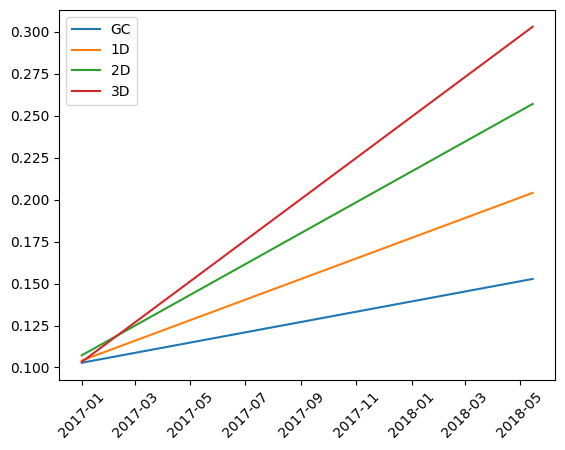

In [7]:
# Uso:
cumulative_transactions(df)

## Estimando el Efecto de Corto Plazo con Análisis Frecuentista
Utilice una simple resta de las tasas de conversión entre el grupo control y cada uno de los grupos de tratamiento en el día del envío del estímulo. Luego, realice un test de hipótesis para verificar si la diferencia encontrada es significativa. Finalmente, aplique el estimador de Wald para ajustar el efecto promedio de tratamiento considerando a aquellos que no vieron el estímulo.

El df se crea automáticamente en la celda "Set Up"

In [2]:
from scipy import stats

def freq_analyis(df):
    for group in ["1D", "2D", "3D"]:
        t_group = df[df["GRUPO"] == group]
        control_group = df[df["GRUPO"] == "GC"]

        ate = t_group['Outcome'].mean() - control_group['Outcome'].mean()

        t_val, p_val = stats.ttest_ind(t_group['Outcome'], control_group['Outcome'])

        wald_estimate = t_group[t_group['shown']]['Outcome'].mean() - control_group[control_group['shown']]['Outcome'].mean()

        print(f"Group {group}, ATE: {ate}, P-value: {p_val}, Wald Estimate: {wald_estimate}")

In [3]:
# Uso:
freq_analyis(df)

Group 1D, ATE: 0.026291197438268965, P-value: 4.0668874627815445e-64, Wald Estimate: 0.027921755708088525
Group 2D, ATE: 0.05431822563851099, P-value: 3.6877041454114837e-118, Wald Estimate: 0.050761177319183226
Group 3D, ATE: 0.07531979087082208, P-value: 1.2231745729441399e-129, Wald Estimate: 0.07445133949026986
